<h1>Pandas Groupby with Hurricane Data<h1>

Import Numpy, Pandas and Matplotlib and set the display options. Use the following code to load a CSV file of the NOAA IBTrACS hurricane dataset:

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
#display options
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline

url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have? (715666 rows)

In [2]:
len(df)

715666

How many North Atlantic hurricanes are in this dataset? (126593)

In [3]:
len(df[df["BASIN"] == "NA"])

126593

1) Get the unique values of the BASIN, SUBBASIN, and NATURE columns

In [4]:
unique_basin = df["BASIN"].unique()
unique_subbasin = df["SUBBASIN"].unique()
unique_nature = df["NATURE"].unique()

In [5]:
unique_basin
unique_subbasin
unique_nature

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

2) Rename the WMO_WIND and WMO_PRES columns to WIND and PRES

In [6]:
df.rename(columns={"WMO_WIND":"WIND"}, inplace = True) #have to access dictionary bc the column name is basically the key to all the values in the dataset
df.rename(columns={"WMO_PRES":"PRES"}, inplace = True)
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


3) Get the 10 largest rows in the dataset by WIND

In [7]:
df.nlargest(10, "WIND")

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


4) Group the data on SID and get the 10 largest hurricanes by WIND

In [8]:
sid_group = df.groupby("SID")
#can't do nlargest bc the dataframeobject has no attribute to nlargest but have to access the series first thru np
sid_group["WIND"].aggregate(np.max).nlargest(10)

SID
2015293N13266    185.0
1980214N11330    165.0
1935241N23291    160.0
1988253N12306    160.0
1997253N12255    160.0
2005289N18282    160.0
2019236N10314    160.0
1998295N12284    155.0
2005261N21290    155.0
2009288N07267    155.0
Name: WIND, dtype: float64

5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes. Use the name on the x-axis.

<Axes: xlabel='NAME'>

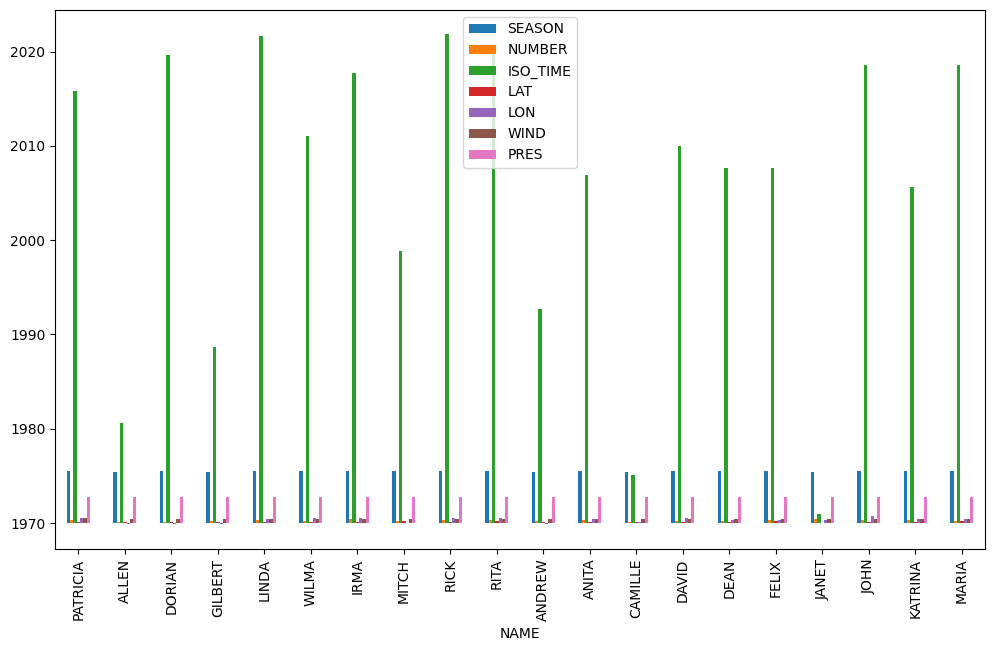

In [9]:
#strongest 20 wind hurricanes
name_group = df.groupby("NAME")
#have to groupby name in order to use name for x-axis and avoid repeats
name_group.aggregate(np.max).nlargest(20, "WIND").plot(kind="bar")

6) Plot the count of all datapoints by Basin as a bar chart

<Axes: xlabel='BASIN'>

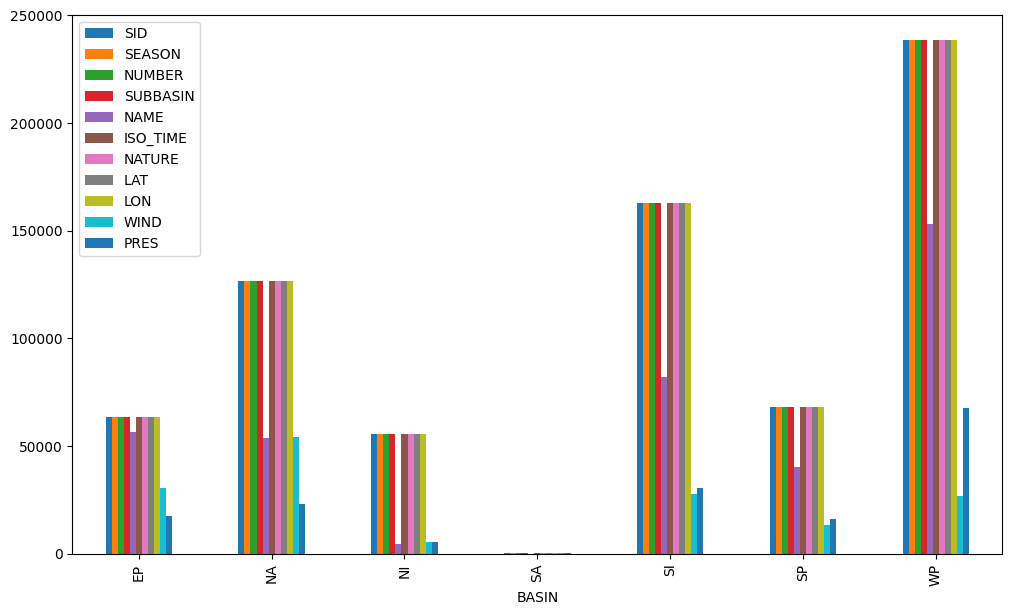

In [10]:
#i decided to just aggregate to the dataframe itself
basin_group_count = df.groupby("BASIN").aggregate("count")
basin_group_count.plot(kind = "bar")

7) Plot the count of unique hurricanes by Basin as a bar chart.

Text(0, 0.5, 'Count')

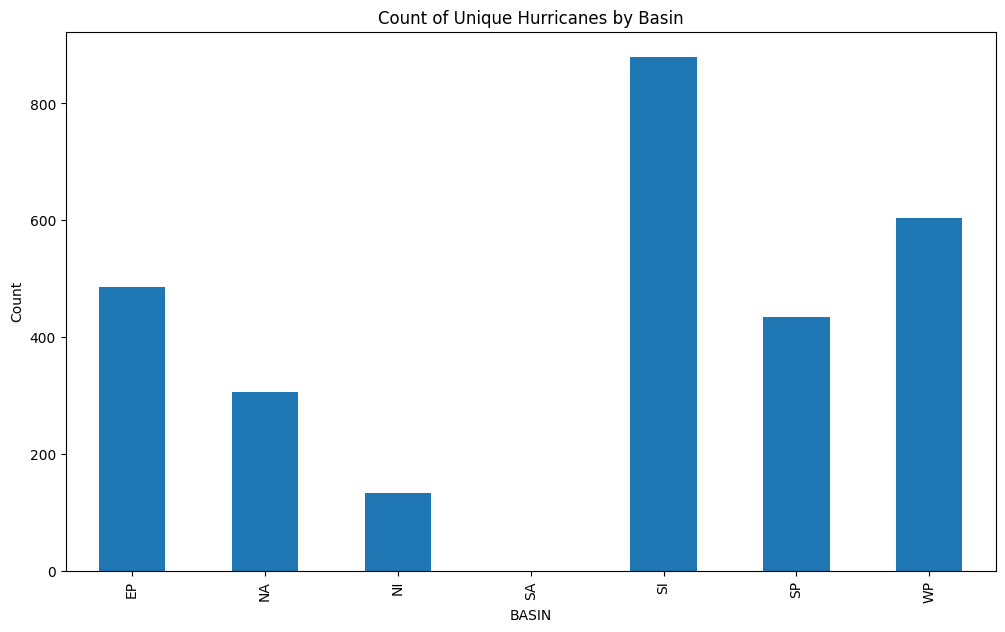

In [11]:
#how do i get unique hurricanes by basin w/o it being an array
basin_group_unique = df.groupby("BASIN")["NAME"].nunique()
basin_group_unique.plot(kind="bar")
plt.title("Count of Unique Hurricanes by Basin")
plt.ylabel("Count")


8) Make a hexbin of the location of datapoints in Latitude and Longitude

<Axes: xlabel='LON', ylabel='LAT'>

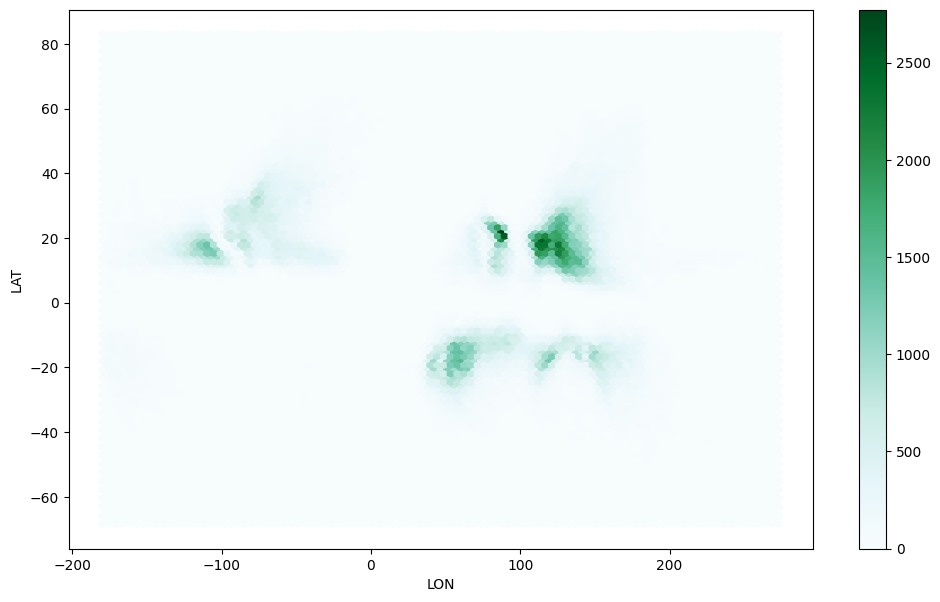

In [ ]:
#what is a hexbin (hexagonal binning plot)
df.plot.hexbin("LON", "LAT")

9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot. First find the SID of this hurricane. Next get this hurricane’s group and plot its position as a scatter plot. Use wind speed to color the points.

<Axes: xlabel='LON', ylabel='LAT'>

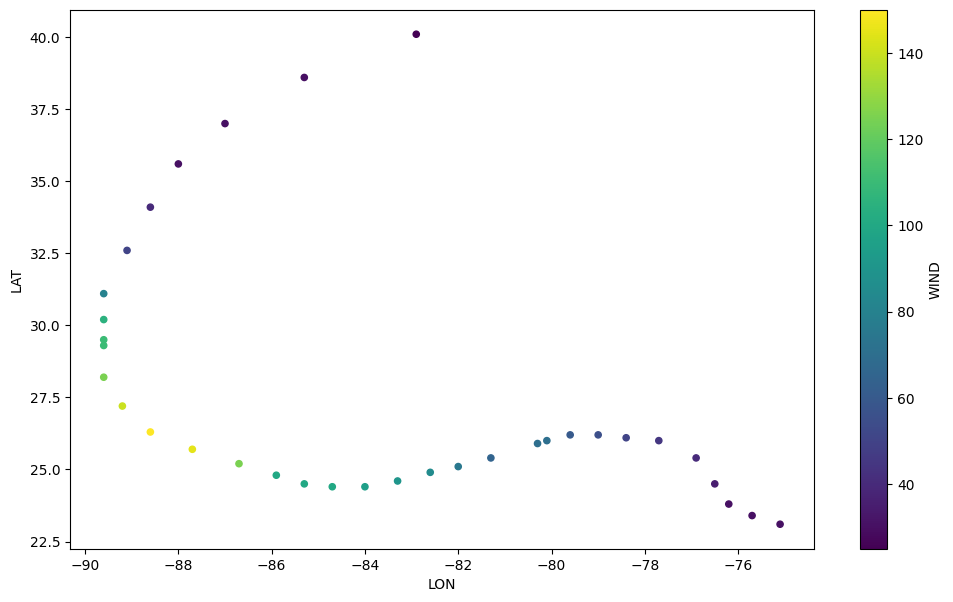

In [12]:
#get sid
katrina_df = df[(df["NAME"] == "KATRINA") & (df["SEASON"] == 2005)]
#we could groupby and then access sid column
katrina_sid = "2005236N23285"
katrina_group = df[df["SID"] == katrina_sid]
katrina_group.plot.scatter("LON", "LAT", c = "WIND")

10) Make time the index on your dataframe

In [13]:
df = df.set_index("ISO_TIME")

11) Plot the count of all datapoints per year as a timeseries. You should use resample.

<Axes: xlabel='ISO_TIME'>

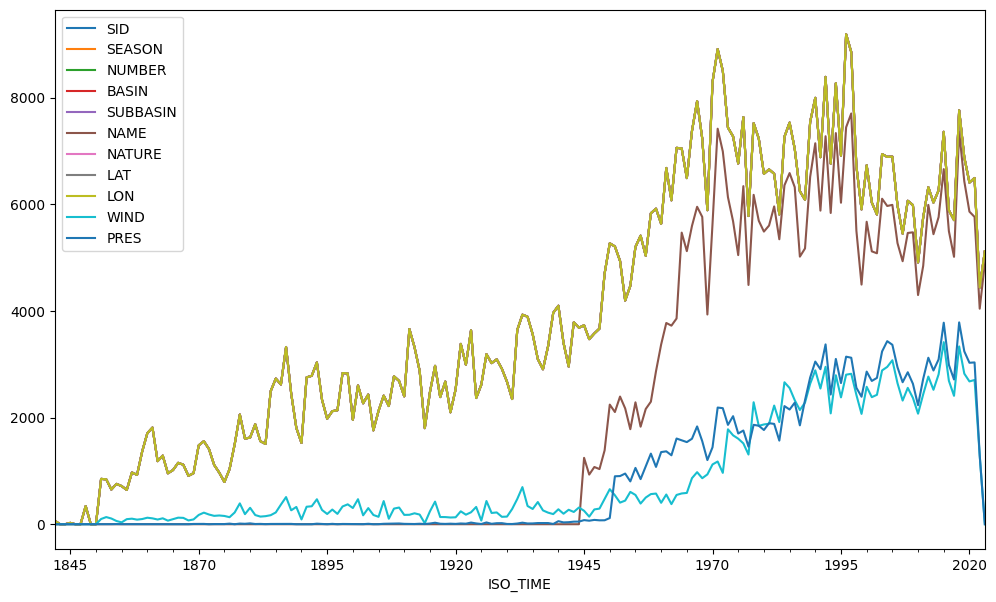

In [14]:
#get the year grouped and the count per year
# year_group_count = df.groupby(df.index.year).resample("M").aggregate("count")
#plot
year_group_count = df.resample("Y").count()
year_group_count.plot()

12) Plot all tracks from the North Atlantic in 2005. You will probably have to iterate through a GroupBy object.

<Axes: xlabel='ISO_TIME'>

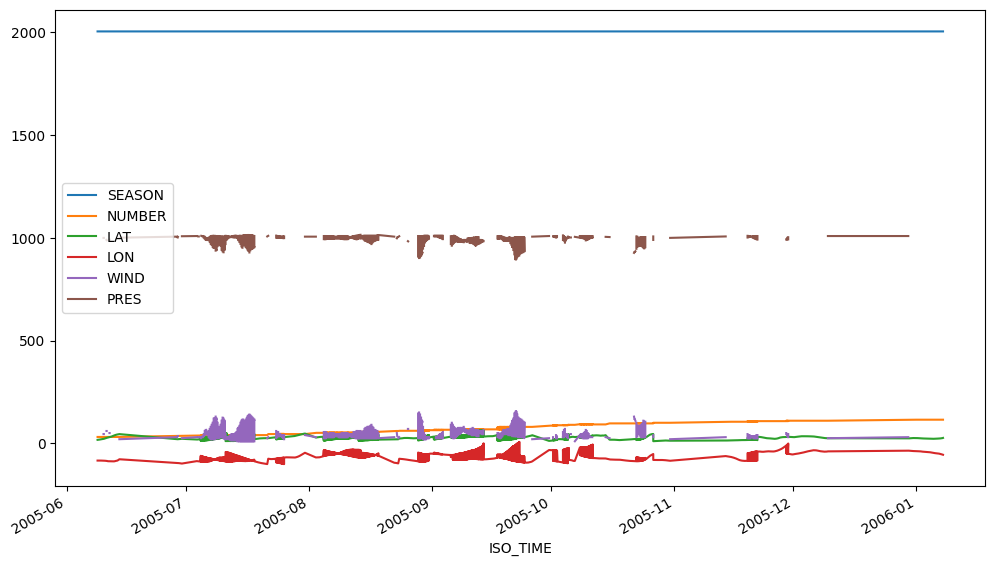

In [15]:
#did i have to use groupby ??
north_atlantic = df[(df["BASIN"] == "NA") & (df["SEASON"] == 2005)]
#plot?? does it want it by position?
#iterate thru groupby object
north_atlantic.plot()

13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic (“NA”) Basin

In [16]:
na_basin = df[(df["BASIN"] == "NA") & (df["SEASON"] >= 1970)]
na_basin.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5000,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.6475,-79.1400,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.8000,-79.3000,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.9575,-79.4925,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1000,-79.7000,25.0,NaN


14) Plot the number of datapoints per day from this filtered dataframe. Make sure you figure is big enough to actually see the plot

<Axes: xlabel='ISO_TIME'>

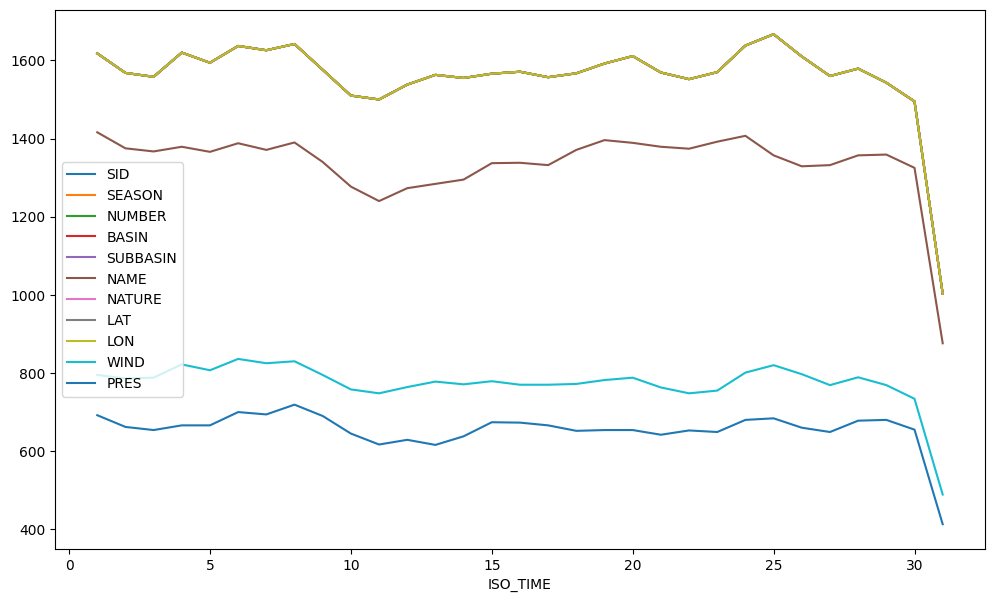

In [17]:
na_basin_day = na_basin.groupby(na_basin.index.day).aggregate("count")
na_basin_day.plot()

15) Calculate the climatology of datapoint counts as a function of dayofyear. Plot the mean and standard deviation on a single figure

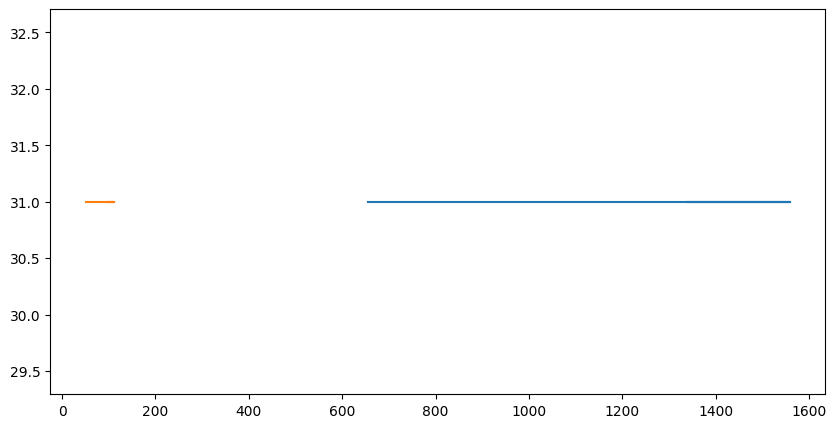

In [26]:
#datapoint of na_basin
#what do we get the climatology of??????????
#problem is that the mean and std are the same values 
daily_climatology_mean = na_basin_day.mean()
daily_climatology_std = na_basin_day.std()
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(daily_climatology_mean, na_basin_day.count(), daily_climatology_std, na_basin_day.count())
# daily_climatology.plot()

16) Use transform to calculate the anomaly of daily counts from the climatology

NOTE: I can't do 15 and 16. 